# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
#filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5']
#filenames1 = ['ccbar0']
#filenames1 = ['ccbar0','phi0']
#filenames1 = ['ccbar_20M','phi0']
#filenames1 = ['phi_new00','ccbar_new00','bbbar_new00']#,
#filenames2 = ['photon_100M_v0','photon_100M_v1']
#filenames2 = ['photon_100M_new_v0','photon_100M_new_v1','photon_100M_new_v2']
#filenames2 = ['photon_new00','photon_new10','photon_new20','photon_new30','photon_new40','photon_new50']
filenames2 = ['dalitz_25M_v0']
filenames1 = ['bbbar_hits0','electron_hits0','positron_hits0']#,'ccbar_new00'
filenames1 = ['ccbar_hits0','electron_hits0','positron_hits0']#,'ccbar_new00'
filenames2 = ['photon_hits0','photon_hits1','photon_hits2','photon_hits3','photon_hits4','photon_hits5']
filenames2 = ['photon_new00','photon_new10','photon_new20','photon_new30','photon_new40','photon_new50','photon_new50']

dalitz = ['dalitz_new00']
dalitz = ['dalitz_new10']
do_dalitz = 0
do_conv = 1

filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 100*120/48

In [3]:
if True:
    data = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        data = pd.concat([data,idata], sort=False)
    data.loc[data['IsTrue0'] > -99, 'IsTrue0'] = 1

    for ifile in range(0,len(filenames2)*do_conv):
        idata = pd.read_csv(filepath+f'{filenames2[ifile]}.csv')
        idata.loc[idata['IsTrue0'] > -99, 'IsTrue0'] = 0
        data = pd.concat([data,idata], sort=False)

    if do_dalitz:
        dalitzdata = pd.read_csv(filepath+f'{dalitz[0]}.csv')
        dalitzlen = int(dalitzdata.shape[0]*1.174e-2*6*50/25/5)
        if do_conv: dalitzdata = dalitzdata[:dalitzlen]
        dalitzdata.loc[dalitzdata['IsTrue0'] > -99, 'IsTrue0'] = 0
        data = pd.concat([data,dalitzdata], sort=False)

    data = data.sample(frac = 1)
    float_columns=('Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore',\
                   'reconpt','reconphi0','reconthe0','px','py','pz','vx','vy','vz',\
                   'sdphi0','sdthe0','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01',\
                   'sdphi1','sdthe1','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11',\
                   'sdphi2','sdthe2','SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21',\
                   'sdphi3','sdthe3','SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31')
    int_columns=('NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3')
    
    for float_column in float_columns:
        data[float_column] = data[float_column].astype('float16')
    for int_column in int_columns:
        data[int_column] = data[int_column].astype('int32')
        
    data = data[(data['Pt'] > 0.4) & (data['Pt'] < 4.4) & (data['Ecore'] > 0.1) & (data['Ecore'] < 25) & (data['reconthe0'] < 25) & (data['reconthe0'] < 25) & (data['reconpt'] < 999)  ]

    data['sdphi4'] = data['sdphi0'] - data['sdphi1']

    #data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    #data['Ecore'] = (data['Ecore']*data['The0']-data['reconpt']) / data['Ecore']
    data['reconpt'] = (data['Pt']-data['reconpt'])/data['Pt']
    #data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    #data['Ecore'] = data['Ecore']*data['The0']
    #data['Ecore1'] = data['Ecore']-data['reconpt']
    #data['Ecore2'] = data['Ecore1']/data['Ecore']
    #data['reconpt1'] = data['Pt']-data['reconpt']
    #data['reconpt2'] = data['reconpt1']/data['Pt']
    #data['reconphi0'] = (data['reconphi0'] - data['Phi0'])*data['Charge']

/home/yoren/.local/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


In [4]:
secondhitcolumns = ['SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01',\
                    'SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11',\
                    'SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21',\
                    'SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31']
for secondhitname in secondhitcolumns:
    data.loc[data[secondhitname] < -99, secondhitname] = -99
    data.loc[data[secondhitname] >  99, secondhitname] = -99

In [5]:
data.head()

NBDThit        Pt      Phi0      The0     PhiDC        ZDC     Alpha  \
217916         1  1.062500  0.185425  1.889648  0.385742 -72.312500 -0.106750   
753967         1  1.094727  2.591797  1.364258  2.404297  45.937500  0.095581   
1862934        3  0.452881  0.734375  1.607422  0.280518  -7.699219  0.234863   
3243121        3  0.481689  2.962891  1.375977  3.394531  43.125000 -0.217041   
582142         3  0.471436  3.767578  1.603516  3.332031  -7.386719  0.216431   

            Ecore  Centrality  Charge  ...  IsTrue3  SecondHitPhiR3  \
217916   1.018555          25       1  ...        0       -32.53125   
753967   1.117188          36      -1  ...        0       -99.00000   
1862934  0.470459          92      -1  ...        1       -99.00000   
3243121  0.479980          77       1  ...        0       -99.00000   
582142   0.412354          70      -1  ...        0       -99.00000   

         SecondHitPhiL3  SecondHitTheR3  SecondHitTheL3  SecondHitPhiR31  \
217916        21.296875       -2.109375      -15.164062          -33.375   
753967       -99.000000      -99.000000      -99.000000          -99.000   
1862934      -99.000000      -99.000000      -99.000000          -99.000   
3243121      -99.000000      -99.000000      -99.000000          -99.000   
582142       -99.000000      -99.000000      -99.000000          -99.000   

         SecondHitPhiL31  SecondHitTheR31  SecondHitTheL31    sdphi4  
217916             -99.0          0.69043            -99.0  0.189453  
753967             -99.0        -99.00000            -99.0 -0.022705  
1862934            -99.0        -99.00000            -99.0 -0.218750  
3243121            -99.0        -99.00000            -99.0 -0.270996  
582142             -99.0        -99.00000            -99.0 -0.127808  

[5 rows x 65 columns]

In [6]:
#data = data[11023232:]
print(data.size, data.shape)

691149550 (10633070, 65)


In [7]:
# удалим лишние колонки
data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','reconphi0','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
#data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','sdphi1','sdphi2','sdphi3','sdthe0','sdthe1','sdthe2','sdthe3','reconphi0','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
#data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
data = data.drop(columns = ['Alpha','NBDThit', 'Arm', 'Charge'] )
#data = data.drop(columns=  ['SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01'])
#data = data.drop(columns=  ['SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11'])
#data = data.drop(columns=  ['SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21'])
#data = data.drop(columns=  ['SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31'])


In [8]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(4, 3, figsize=(15, 6))
    for i, feature in enumerate(['IsTrue0', 'Pt', 'SecondHitPhiR01', 'SecondHitPhiL01','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1' ]):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


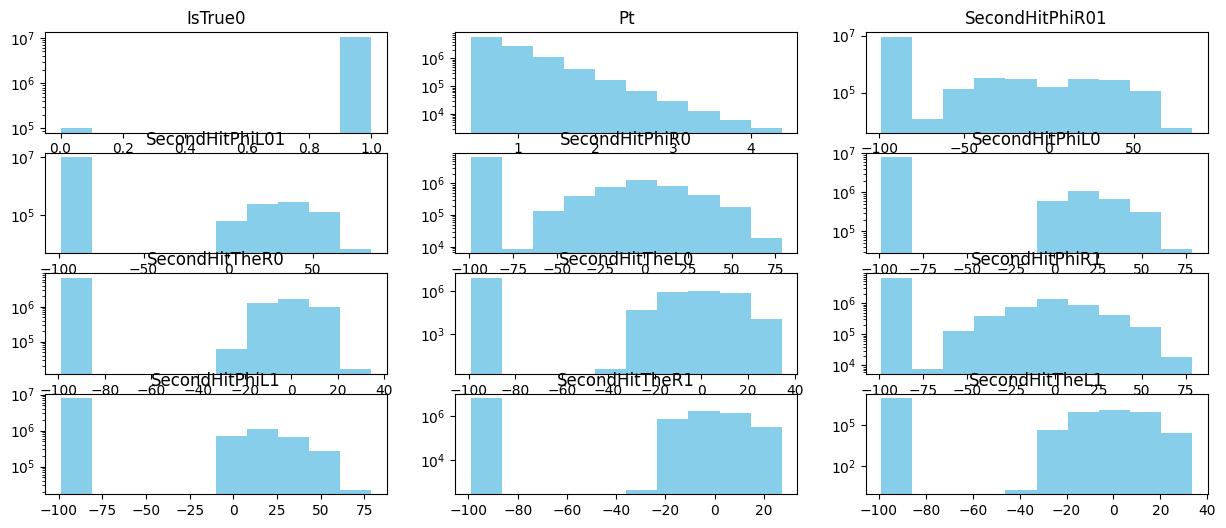

In [9]:
analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [57]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/2)
    cut_off_test = int (data.shape[0]/4*3 + 1)

    print(cut_off_val,cut_off_test)
    all_test = data[cut_off_test:]
    w_all = data['Pt']*(1-data['IsTrue0'])*hadron_weight + 1
    y = data['IsTrue0']
    data = data.drop(columns = ['IsTrue0'])
    data = data.drop(columns = ['Centrality','Pt','Ecore'])
    #data = data.drop(columns = ['sdphi0','sdphi1','sdphi2','sdphi3'])
    if do_conv:
        data = data.drop(columns = ['SecondHitPhiL0','SecondHitTheL0','SecondHitPhiL01','SecondHitTheL01'])
        data = data.drop(columns = ['SecondHitPhiL1','SecondHitTheL1','SecondHitPhiL11','SecondHitTheL11'])
        data = data.drop(columns = ['SecondHitPhiL2','SecondHitTheL2','SecondHitPhiL21','SecondHitTheL21'])
        data = data.drop(columns = ['SecondHitPhiL3','SecondHitTheL3','SecondHitPhiL31','SecondHitTheL31'])
        data = data.drop(columns = ['SecondHitPhiR0','SecondHitTheR0','SecondHitPhiR01','SecondHitTheR01'])
        data = data.drop(columns = ['SecondHitPhiR1','SecondHitTheR1','SecondHitPhiR11','SecondHitTheR11'])
        data = data.drop(columns = ['SecondHitPhiR2','SecondHitTheR2','SecondHitPhiR21','SecondHitTheR21'])
        data = data.drop(columns = ['SecondHitPhiR3','SecondHitTheR3','SecondHitPhiR31','SecondHitTheR31'])
        
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    w_train, w_test = w_all[:cut_off_test], w_all[cut_off_test:] 
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test, all_test, w_train, w_test

In [60]:
X_train_all, X_test, y_train_all, y_test, all_test, w_train, w_test = feature_engineering(data)

5316535 7974803


In [61]:
X_test

reconpt    sdphi0    sdthe0    sdphi1    sdthe1     sdphi2  \
336947  -0.087402 -0.246338 -0.320068 -0.344238 -1.004883  -0.408447   
4209745  0.280273 -0.320068  1.009766  0.872070  0.341797  -0.032074   
3562704 -0.620117 -0.092285  1.052734 -0.774902  2.445312  -2.175781   
3179395 -1.245117 -0.616699  1.240234 -3.400391  0.098450 -10.000000   
2684258 -0.084229 -1.344727  0.847656 -1.039062  0.578613  -0.245728   
...           ...       ...       ...       ...       ...        ...   
2035714 -0.037689  0.612793 -0.514160  0.166016  0.745117 -10.000000   
4206026  0.093628 -0.114258  0.537109  0.664062  0.437256  -0.561523   
2963187  0.040253 -0.673340 -0.979980  0.226929 -0.024612 -10.000000   
2550115 -0.027771  0.135498  0.055389  0.171021 -0.253418   0.469727   
2880134 -0.423340  0.224609 -0.768066 -1.290039 -0.833496 -10.000000   

            sdthe2     sdphi3     sdthe3    sdphi4  
336947    0.740234 -10.000000 -10.000000  0.097900  
4209745   0.249756  -0.575684  -0.643066 -1.192383  
3562704  -2.283203 -10.000000 -10.000000  0.682617  
3179395 -10.000000  -1.026367   1.418945  2.783203  
2684258   0.425049 -10.000000 -10.000000 -0.305664  
...            ...        ...        ...       ...  
2035714 -10.000000   0.246948   0.061188  0.446777  
4206026  -0.854492 -10.000000 -10.000000 -0.778320  
2963187 -10.000000   0.091919  -0.195557 -0.900391  
2550115   1.165039  -0.172974  -1.566406 -0.035522  
2880134 -10.000000  -1.088867   0.006969  1.514648  

[2658267 rows x 10 columns]

In [63]:
X_train = X_train_all
y_train = y_train_all
if False:
    w_train = y_train-1
    w_test = y_test-1
    w_train_all = y_train_all - 1
    w_train = w_train*(-hadron_weight)+1
    w_test = w_test*(-hadron_weight)+1
    w_train_all = w_train_all*(-hadron_weight)+1

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [64]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=4, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train, w_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))

print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.01      1.00      0.02     25395
           1       0.00      0.00      0.00   2632872

    accuracy                           0.01   2658267
   macro avg       0.00      0.50      0.01   2658267
weighted avg       0.00      0.01      0.00   2658267

confusion matrix
[[  25395       0]
 [2632872       0]]


In [ ]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.2],
    "min_samples_split": [0.0001],
    "max_depth":[12],
    "max_features":["sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[12]
    }

classif = GradientBoostingClassifier()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=8)
clf.fit(X_train, y_train, sample_weight=w_train)
print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

точность:  0.7290663428466742
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.001, 'n_estimators': 12}
0.7343751312262211
time of execution (sec) 573.3241391181946


# Cross Validation

In [66]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.03      0.86      0.06     25395
           1       1.00      0.73      0.84   2632872

    accuracy                           0.73   2658267
   macro avg       0.51      0.79      0.45   2658267
weighted avg       0.99      0.73      0.83   2658267



In [67]:
y_pred_probs = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Model Evaluation

log loss: 0.4539097114527841
roc auc: 0.868945254486281
f1 score: 0.8774995244067639


Text(0.5, 1.0, 'ROC AUC Curve')

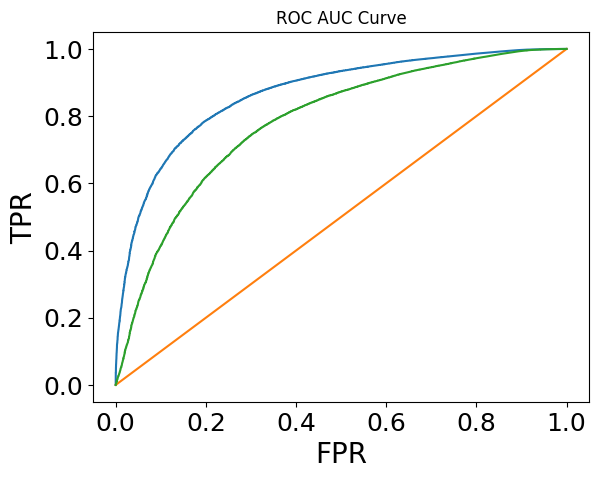

In [68]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score

print('log loss:', log_loss(y_test, y_pred_probs, sample_weight=w_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1, sample_weight=w_test)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))
tpr2 = tpr*tpr
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.plot(fpr, tpr2)
plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR", fontsize=20)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 18) 
plt.title('ROC AUC Curve')

In [69]:
pred_baseline = np.ones_like(y_test) * y_test.mean()
print("baseline auc:", roc_auc_score(y_test, pred_baseline))
print("baseline log_loss:", log_loss(y_test, pred_baseline))

baseline auc: 0.5
baseline log_loss: 0.05393827670645606


In [70]:
i = 400000
print(round(tpr[i],3),round(fpr[i]/tpr[i]/tpr[i],4))
print(round(tpr[i],3),round(fpr[i]/tpr[i],4))
print(thresholds[i],fpr[i],tpr[i])
#print((fpr[i]/tpr[i]*data1.shape[0]/data2.shape[0]/10)**-1,(fpr[i]/1.*data1.shape[0]/data2.shape[0]/10)**-1)

0.819 0.3581
0.819 0.2934
0.40151336759592393 0.24040242000703257 0.8193820284465025


In [71]:
print(sum(predicted),len(predicted))

1919824 2658267


In [72]:
kek_data = data
kek_data = kek_data.drop(columns = ['IsTrue0'])
kek_data = kek_data.drop(columns = ['Centrality','Pt','Ecore'])
if do_conv:
    kek_data = kek_data.drop(columns = ['SecondHitPhiL0','SecondHitTheL0','SecondHitPhiL01','SecondHitTheL01'])
    kek_data = kek_data.drop(columns = ['SecondHitPhiL1','SecondHitTheL1','SecondHitPhiL11','SecondHitTheL11'])
    kek_data = kek_data.drop(columns = ['SecondHitPhiL2','SecondHitTheL2','SecondHitPhiL21','SecondHitTheL21'])
    kek_data = kek_data.drop(columns = ['SecondHitPhiL3','SecondHitTheL3','SecondHitPhiL31','SecondHitTheL31'])
    kek_data = kek_data.drop(columns = ['SecondHitPhiR0','SecondHitTheR0','SecondHitPhiR01','SecondHitTheR01'])
    kek_data = kek_data.drop(columns = ['SecondHitPhiR1','SecondHitTheR1','SecondHitPhiR11','SecondHitTheR11'])
    kek_data = kek_data.drop(columns = ['SecondHitPhiR2','SecondHitTheR2','SecondHitPhiR21','SecondHitTheR21'])
    kek_data = kek_data.drop(columns = ['SecondHitPhiR3','SecondHitTheR3','SecondHitPhiR31','SecondHitTheR31'])
proba_loc = clf.predict_proba(kek_data)
print(proba_loc[0][1])

0.8053320202438595


In [73]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Conv.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

In [74]:
mycute,mycuth, AIcute, AIcuth = 0.1, 0.1, 0.1, 0.1
norm_e, norm_h = 0.1, 0.1
data0 = data.reset_index()  # make sure indexes pair with number of rows

sigma, sigma_veto = 3, -2

pt = 0.
pt_prev = 0.
IsTrue0_prev = 1
IsTrue0 = 1
counter =-1
cont = 1
myml = 1
myml_now = 1
centrality, centralitynow = 0, 0
SecondHitPhiL0, SecondHitPhiL1, SecondHitPhiL2, SecondHitPhiL3 = 0,0,0,0
pSecondHitPhiL0, pSecondHitPhiL1, pSecondHitPhiL2, pSecondHitPhiL3 = 0,0,0,0
SecondHitTheL0, SecondHitTheL1, SecondHitTheL2, SecondHitTheL3 = 0,0,0,0
pSecondHitTheL0, pSecondHitTheL1, pSecondHitTheL2, pSecondHitTheL3 = 0,0,0,0
for index, row in data0.iterrows():
    counter+=1
    if counter>400000: break
    SecondHitPhiL0loc, SecondHitPhiL1loc, SecondHitPhiL2loc, SecondHitPhiL3loc = row['SecondHitPhiL0'], row['SecondHitPhiL1'], row['SecondHitPhiL2'], row['SecondHitPhiL3']
    SecondHitTheL0loc, SecondHitTheL1loc, SecondHitTheL2loc, SecondHitTheL3loc = row['SecondHitTheL0'], row['SecondHitTheL1'], row['SecondHitTheL2'], row['SecondHitTheL3']
    sdthe0, sdthe1, sdthe2, sdthe3 = 0, 0, 0, 0
    centralityloc, ptloc, IsTrue0loc = row['Centrality'], row['Pt'], row['IsTrue0']
    if abs(pt -  ptloc) < 1e-6: 
        cont = 0
        myml_now*=proba_loc[counter][1]>thresholds[i]
    else: 
        pt_prev = pt
        pt = ptloc
        centrality = centralitynow
        centralitynow = centralityloc
        SecondHitPhiL0, SecondHitPhiL1, SecondHitPhiL2, SecondHitPhiL3 = pSecondHitPhiL0, pSecondHitPhiL1, pSecondHitPhiL2, pSecondHitPhiL3 
        pSecondHitPhiL0, pSecondHitPhiL1, pSecondHitPhiL2, pSecondHitPhiL3 = SecondHitPhiL0loc, SecondHitPhiL1loc, SecondHitPhiL2loc, SecondHitPhiL3loc
        SecondHitTheL0, SecondHitTheL1, SecondHitTheL2, SecondHitTheL3 = pSecondHitTheL0, pSecondHitTheL1, pSecondHitTheL2, pSecondHitTheL3 
        pSecondHitTheL0, pSecondHitTheL1, pSecondHitTheL2, pSecondHitTheL3 = SecondHitTheL0loc, SecondHitTheL1loc, SecondHitTheL2loc, SecondHitTheL3loc 
        IsTrue0 = IsTrue0_prev
        IsTrue0_prev = IsTrue0loc
        myml = myml_now
        myml_now = proba_loc[counter][1]>thresholds[i]
        cont = 1

    if not cont: continue
    if pt_prev<0.4 or centrality<0: continue
    
    if IsTrue0: e_pt_hist_NC.Fill(pt_prev,centrality)
    else:    h_pt_hist_NC.Fill(pt_prev,centrality)
    if not ( (SecondHitPhiL1>0 and SecondHitPhiL1<12.5 and abs(SecondHitTheL1)<12.5) \
            or (SecondHitPhiL2>0 and SecondHitPhiL2<25 and abs(SecondHitTheL2)<12.5) \
            or (SecondHitPhiL3>0 and SecondHitPhiL3<25 and abs(SecondHitTheL3)<12.5) ):
        if IsTrue0: 
            mycute+=1
            e_pt_hist_SC.Fill(pt_prev,centrality)
        else: 
            mycuth+=1+hadron_weight
            h_pt_hist_SC.Fill(pt_prev,centrality)
    if myml: 
        if IsTrue0: 
            AIcute+=1
            e_pt_hist_AI.Fill(pt_prev,centrality)
        else: 
            AIcuth+=1+hadron_weight
            h_pt_hist_AI.Fill(pt_prev,centrality)
    if IsTrue0: norm_e+=1
    else: norm_h+=1+hadron_weight
    #if counter<10: 
    #    print(proba_loc[counter],answer(centrality,pt,ep,n0,disp,chi2,npe0,prob))
        #print(centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 )

In [75]:
print(norm_e, norm_h,round(mycute/norm_e,3),round(mycuth/norm_h,3), round(AIcute/norm_e,3), round(AIcuth/norm_h,3), round(AIcuth/AIcute/norm_h*norm_e,3),round(fpr[i]/tpr[i],3))

395913.1 978398.1 0.726 0.486 0.821 0.2 0.243 0.293


In [76]:
print(round(AIcute/mycute/(AIcuth/mycuth),3),round(AIcute/mycute,3),round(AIcuth/mycuth,3), round(30*AIcute/norm_e/AIcuth*norm_h))

2.753 1.131 0.411 123


In [77]:
%run input/Format.ipynb
%jsroot on

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [78]:
c1 = root.TCanvas("c1","c1",1400,2500)
c1.Divide(2,5)
part_names_legend= [ "prompt e^{-} " , "#gamma#rightarrow e^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+2*icentr)
    root.gPad.SetLogy()
    e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}").SetLineWidth(312)
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}").SetLineWidth(3)
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}").SetLineWidth(3)
    e_pt_hist_NC.SetLineColor(4)
    e_pt_hist_SC.SetLineColor(2)
    e_pt_hist_AI.SetLineColor(1)
    proj = e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    proj.SetMinimum(2)
    Format_Hist_total(proj, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    proj.Draw()
    phoj_s = e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2)
    phoj_s.Draw("same")
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.65,0.65,0.95,0.95,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(phoj_s,"std","l")
    legends[-1].AddEntry(e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()

    c1.cd(2+2*icentr)
    root.gPad.SetLogy()
    h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}").SetLineWidth(3)
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}").SetLineWidth(3)
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}").SetLineWidth(3)
    h_pt_hist_NC.SetLineColor(4)
    h_pt_hist_SC.SetLineColor(2)
    h_pt_hist_AI.SetLineColor(1)
    projh = h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    Format_Hist_total(projh, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    projh.SetMinimum(2)
    projh.Draw()
    phoj_sd = h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2)
    phoj_sd.Draw("same")
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.7,0.65,0.95,0.95,part_names_legend[1]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(phoj_sd,"std","l")
    legends[-1].AddEntry(h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()
c1.Draw()
print(h_pt_hist_NC.GetBinContent(10,1),e_pt_hist_NC.GetBinContent(10,1))

7.0 2108.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [79]:
if False:
    e_pt_hist_AI.Write()
    h_pt_hist_AI.Write()
    e_pt_hist_SC.Write()
    h_pt_hist_SC.Write()
    e_pt_hist_NC.Write()
    h_pt_hist_NC.Write()
    outfile.Close()

In [80]:
import pickle
with open('output/bdt_conv.pkl','wb') as f:
    pickle.dump(clf,f)

print(clf.predict(kek_data[0:10]))

[1 1 1 1 1 0 1 1 1 0]


In [81]:
import pickle
# load
with open('output/bdt_conv.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(kek_data[0:10]))

[1 1 1 1 1 0 1 1 1 0]


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.663045 to fit



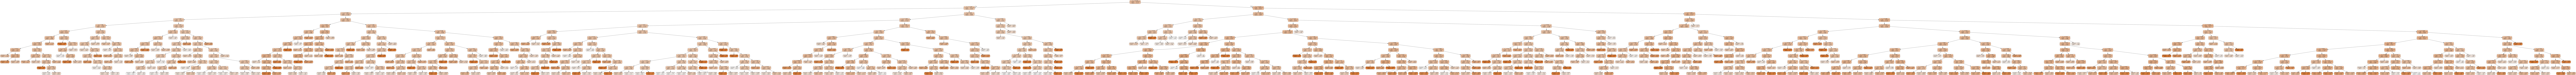

In [82]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [83]:
clf2.predict(kek_data[0:100])

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int32)

In [84]:
clf2.predict_proba(kek_data[0:100])

array([[0.19466798, 0.80533202],
       [0.38411758, 0.61588242],
       [0.2863814 , 0.7136186 ],
       [0.17113712, 0.82886288],
       [0.20296177, 0.79703823],
       [0.88248899, 0.11751101],
       [0.30579343, 0.69420657],
       [0.26045505, 0.73954495],
       [0.34965416, 0.65034584],
       [0.56796741, 0.43203259],
       [0.15857265, 0.84142735],
       [0.25177232, 0.74822768],
       [0.11876054, 0.88123946],
       [0.20302903, 0.79697097],
       [0.26268742, 0.73731258],
       [0.23542547, 0.76457453],
       [0.15553279, 0.84446721],
       [0.63373318, 0.36626682],
       [0.2483297 , 0.7516703 ],
       [0.62001678, 0.37998322],
       [0.25869107, 0.74130893],
       [0.20350647, 0.79649353],
       [0.23006939, 0.76993061],
       [0.23539369, 0.76460631],
       [0.38650208, 0.61349792],
       [0.47211153, 0.52788847],
       [0.20635427, 0.79364573],
       [0.26436622, 0.73563378],
       [0.29501732, 0.70498268],
       [0.32236684, 0.67763316],
       [0.

In [85]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.001, 'n_estimators': 12}


In [86]:
clf2.best_estimator_.predict_proba(kek_data[9:20])

array([[0.56796741, 0.43203259],
       [0.15857265, 0.84142735],
       [0.25177232, 0.74822768],
       [0.11876054, 0.88123946],
       [0.20302903, 0.79697097],
       [0.26268742, 0.73731258],
       [0.23542547, 0.76457453],
       [0.15553279, 0.84446721],
       [0.63373318, 0.36626682],
       [0.2483297 , 0.7516703 ],
       [0.62001678, 0.37998322]])

In [87]:
y = clf2.best_estimator_[0, 0].predict(kek_data[9:19].values.tolist())*0
#y = gb_clf.decision_function(kek_data[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,10):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(kek_data[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(kek_data[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[-0.23578435  1.48848529  1.09276121  1.65584507  1.29325999  1.01348767
  1.20820655  1.54317506 -0.50954328  0.99027902]
[-0.32387924 -0.27362478 -0.31751957 -0.39626318 -0.31751957 -0.31751957
 -0.27362478 -0.27362478 -0.33280206 -0.35236839 -0.47850061]
[0.44132549 0.81585081 0.74890132 0.83967946 0.78469846 0.73370214
 0.76998147 0.82392581 0.3753006  0.72914303]


In [88]:
best_gbc = clf2.best_estimator_

In [89]:
n_estim = best_gbc.n_estimators

In [90]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(kek_data[9:19]))
arr = clf2.decision_function(kek_data[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(kek_data[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[-0.27356303  1.66888682  1.08918212  2.0042202   1.36746928  1.03204713
  1.17792515  1.69184935 -0.54826592  1.10754048]
[0.43203259 0.84142735 0.74822768 0.88123946 0.79697097 0.73731258
 0.76457453 0.84446721 0.36626682 0.7516703 ]
0.2


In [91]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(kek_data[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(kek_data[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [92]:
print(log_odds_predictions)

[[-0.28441557666640194, 1.2040162462270594, 1.4832435796498116, 1.2040162462270594, 1.2040162462270594, 1.2040162462270594, 1.2040162462270594, 1.2040162462270594, -0.9801485466683542, 0.8563151785392336], [-0.007333848713958974, 1.0962969384201275, 0.7312730238390783, 1.0962969384201275, 0.7312730238390783, 0.7312730238390783, 0.9476929372998837, 0.9476929372998837, 0.5887532814795813, 0.9225165080544266], [0.0466737833918198, 0.9679200126451124, 1.8209165190677339, 0.9679200126451124, 0.9679200126451124, 0.5893906820168232, 1.1886853584468906, 0.9679200126451124, 0.05595009805335029, 0.5981308639681051], [-0.0757751324763506, 0.8402566275654141, 0.04404394922851649, 0.7077474923452631, 1.1179214714720214, 0.7077474923452631, 0.22250156349446182, 1.1179214714720214, -0.5022451424665494, 0.6365268618590569], [-0.4573090807474971, 0.6580073928358684, 0.39671843228577663, 0.6580073928358684, 0.6580073928358684, 0.6580073928358684, 0.6580073928358684, 0.6580073928358684, -0.58564073470624

In [93]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(10)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(kek_data[9:19]))

0.2 -0.23578435088908592
[-0.27356303  1.66888682  1.08918212  2.0042202   1.36746928  1.03204713
  1.17792515  1.69184935 -0.54826592  1.10754048]


In [94]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(kek_data[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

12
1
[[-0.28441557666640194, -0.007333848713958974, 0.0466737833918198, -0.0757751324763506, -0.4573090807474971, -0.04838918510437861, 0.37657255662578093, -0.09867581722325985, -0.5893700155017345, -0.0408994380294487, -0.1504446410896508, -0.038448754117165376], [1.2040162462270594, 1.0962969384201275, 0.9679200126451124, 0.8402566275654141, 0.6580073928358684, 0.7039533064691447, 0.636870305735038, 0.5705175622057462, 0.5059539455985709, 0.2586341058280215, 0.29880249523302094, 0.6032051547268249], [1.4832435796498116, 0.7312730238390783, 1.8209165190677339, 0.04404394922851649, 0.39671843228577663, 0.08269428882549287, 0.37657255662578093, 0.33936804820842315, 0.25878330269144073, -0.06980765303637908, 0.020553296425830193, -0.038448754117165376], [1.2040162462270594, 1.0962969384201275, 0.9679200126451124, 0.7077474923452631, 0.6580073928358684, 0.7039533064691447, 0.636870305735038, 1.4156609462033505, 0.20868397238290884, 0.6800687380372693, 1.2608203145174977, 0.48105534302458

In [95]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [96]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [97]:
#print(f"double mytree{list(kek_data.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[1] > -0.778564453125) if (x[0] > -0.3189697265625) if (x[9] > -1.66162109375) if (x[1] > -0.2877197265625) if (x[4] > -2.7060546875) if (x[9] <= 1.60498046875) if (x[1] <= 2.3251953125) if (x[3] > 0.085357666015625) if (x[3] <= 1.86767578125) if (x[7] <= 3.6494140625) if (x[2] > -3.7744140625) if (x[1] > -0.20611572265625)   return 1.2040162462270594;  // | based on 2,160,135 samples
        if  (x[1] > -0.778564453125) if (x[0] > -0.3189697265625) if (x[9] > -1.66162109375) if (x[1] > -0.2877197265625) if (x[4] > -2.7060546875) if (x[9] <= 1.60498046875) if (x[1] <= 2.3251953125) if (x[3] <= 0.085357666015625) if (x[1] > -0.0430145263671875) if (x[2] > -2.1416015625) if (x[1] <= 1.01123046875) if (x[3] <= 0.0453948974609375)   return 0.8563151785392336;  // | based on 915,971 samples
        if  (x[1] > -0.778564453125) if (x[0] > -0.3189697265625) if (x[9] > -1.66162109375) if (x[1] <= -0.2877197265625) if (x[1] <= -0.533447265625) if (x[6]

In [98]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [99]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[1] > -0.778564453125) and (x[0] > -0.3189697265625) and (x[9] > -1.66162109375) and (x[1] > -0.2877197265625) and (x[4] > -2.7060546875) and (x[9] <= 1.60498046875) and (x[1] <= 2.3251953125) and (x[3] > 0.085357666015625) and (x[3] <= 1.86767578125) and (x[7] <= 3.6494140625) and (x[2] > -3.7744140625) and (x[1] > -0.20611572265625) :  return 1.2040162462270594  # | based on 2,160,135 samples
        if (x[1] > -0.778564453125) and (x[0] > -0.3189697265625) and (x[9] > -1.66162109375) and (x[1] > -0.2877197265625) and (x[4] > -2.7060546875) and (x[9] <= 1.60498046875) and (x[1] <= 2.3251953125) and (x[3] <= 0.085357666015625) and (x[1] > -0.0430145263671875) and (x[2] > -2.1416015625) and (x[1] <= 1.01123046875) and (x[3] <= 0.0453948974609375) :  return 0.8563151785392336  # | based on 915,971 samples
        if (x[1] > -0.778564453125) and (x[0] > -0.3189697265625) and (x[9] > -1.66162109375) and (x[1] <= -0.2877197265625)

In [100]:
def mytree(x,y):
    return 0

In [101]:
def mygradboost (x_in, lerning_rate = 0.2):
    prob = 0
    for iestim in range (n_estim):
        prob+=lerning_rate*mytree(iestim, x_in)
    return 1. / ( 1. + np.exp( - prob ) )


In [102]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [103]:
kek_data[9:19].values.tolist()[0][20]

IndexError: list index out of range

In [ ]:
iestim = 10
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(kek_data[9:10].values.tolist())
print(y)
print(kek_data[9+i:10+i].values.tolist()[0][15])
myf = [mytree(iestim, kek_data[9+i:10+i].values.tolist()[0]) for i in range(1)]
print(myf)

[-0.58114256]
-99.0
[0]


In [ ]:
input_x = [ kek_data[9:19].values.tolist()[0][i] for i in range(len(kek_data[9:19].values.tolist()[0])) ]
print(input_x)

[-0.289306640625, 0.4990234375, -1.078125, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -0.83935546875, -1.17578125, 19.1875, 16.34375, 6.5, 5.5625, -99.0, -99.0, -99.0, -99.0, -10.0, -10.0, -99.0, 29.171875, -99.0, -19.875, -99.0, -99.0, -99.0, -99.0, -0.88623046875, -6.93202018737793e-05, 22.390625, 10.15625, -20.203125, -22.1875, -99.0, -99.0, -99.0, -99.0, 1.337890625]


In [ ]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(kek_data[9:19].values.tolist())
y = [y[i][1] for i in range(len(y))]
print(y)

myf = [mygradboost(kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[0.7788457713298998, 0.06976013383043789, 0.5448539556358919, 0.5234516439378218, 0.10760606278398285, 0.06827452254980193, 0.5489715438468193, 0.5254704814771936, 0.7342482995900949, 0.5151167866639129]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['reconpt', 'sdphi0', 'sdthe0', 'SecondHitPhiR0', 'SecondHitPhiL0', 'SecondHitTheR0', 'SecondHitTheL0', 'SecondHitPhiR01', 'SecondHitPhiL01', 'SecondHitTheR01', 'SecondHitTheL01', 'sdphi1', 'sdthe1', 'SecondHitPhiR1', 'SecondHitPhiL1', 'SecondHitTheR1', 'SecondHitTheL1', 'SecondHitPhiR11', 'SecondHitPhiL11', 'SecondHitTheR11', 'SecondHitTheL11', 'sdphi2', 'sdthe2', 'SecondHitPhiR2', 'SecondHitPhiL2', 'SecondHitTheR2', 'SecondHitTheL2', 'SecondHitPhiR21', 'SecondHitPhiL21', 'SecondHitTheR21', 'SecondHitTheL21', 'sdphi3', 'sdthe3', 'SecondHitPhiR3', 'SecondHitPhiL3', 'SecondHitTheR3', 'SecondHitTheL3', 'SecondHitPhiR31', 'SecondHitPhiL31', 'SecondHitTheR31', 'SecondHitTheL31', 'sdphi4']
42
